In [76]:
from dblinea import DBBase
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
db=DBBase()
schema = "des_dr2"  
tablename = "des_dr2.public_pz_training_set"

```sql
SELECT *
FROM des_dr2.public_specz_compilation
```

In [3]:
query = 'SELECT * FROM des_dr2.public_pz_training_set'

In [4]:
df = db.fetchall_df(query)

In [78]:
df

,spec_id,z,err_z,flag,source,flag_des,coadd_object_id,ra,dec,mag_auto_g_dered,...,magerr_auto_i,magerr_auto_z,magerr_auto_y,g-r,g-i,r-i,r-z,i-z,i-y,z-y
0,123961,0.061259,0.000183,3.0,6DF,3,940327098,-31.217972,-40.231789,15.981974,...,0.000378,0.000664,0.001884,0.810696,1.154108,0.343412,0.621977,0.278564,0.423236,0.144671
1,123962,0.061486,0.000150,4.0,6DF,4,940303193,-30.825847,-39.998405,15.573085,...,0.000751,0.000951,0.002718,0.849826,1.221498,0.371672,0.635321,0.263649,0.454121,0.190472
2,123990,0.057330,0.000150,4.0,6DF,4,949817059,-27.997570,-41.435453,16.291740,...,0.001136,0.001858,0.003815,0.658566,0.945292,0.286726,0.500346,0.213620,0.312518,0.098898
3,123963,0.062580,0.000183,3.0,6DF,3,940306202,-30.830187,-39.992862,16.365583,...,0.000838,0.000894,0.002693,0.816748,1.194998,0.378250,0.663823,0.285573,0.452047,0.166474
4,123964,0.007502,0.000150,4.0,6DF,4,939766243,-31.011622,-39.770606,15.947645,...,0.001875,0.003656,0.009628,0.308819,0.392105,0.083286,0.196278,0.112991,0.155514,0.042522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496257,232852,0.075659,0.000150,4.0,6DF,4,1359696605,44.660048,-35.939769,15.737769,...,0.000526,0.000819,0.002496,0.869326,1.234458,0.365132,0.646121,0.280989,0.428760,0.147771
496258,232853,0.075372,0.000150,4.0,6DF,4,1352925125,44.602271,-35.914926,16.444450,...,0.000659,0.000892,0.002308,0.887104,1.265129,0.378025,0.676105,0.298079,0.450598,0.152518
496259,232854,0.045665,0.000150,4.0,6DF,4,1359693873,45.022628,-35.887247,16.112183,...,0.000887,0.001394,0.003932,0.575518,0.819171,0.243653,0.434044,0.190391,0.267071,0.076680
496260,232855,0.079395,0.000150,4.0,6DF,4,1364500905,45.574177,-35.622301,17.135239,...,0.000826,0.001295,0.004084,0.614174,0.914963,0.300789,0.517309,0.216520,0.315924,0.099403


# Removing outliers

In [6]:
df = df[df['mag_auto_g_dered']<99]
df = df[df['mag_auto_r_dered']<99]
df = df[df['mag_auto_i_dered']<99]
df = df[df['mag_auto_z_dered']<99]
df = df[df['mag_auto_y_dered']<99]

In [75]:
df

,spec_id,z,err_z,flag,source,flag_des,coadd_object_id,ra,dec,mag_auto_g_dered,...,magerr_auto_i,magerr_auto_z,magerr_auto_y,g-r,g-i,r-i,r-z,i-z,i-y,z-y
0,123961,0.061259,0.000183,3.0,6DF,3,940327098,-31.217972,-40.231789,15.981974,...,0.000378,0.000664,0.001884,0.810696,1.154108,0.343412,0.621977,0.278564,0.423236,0.144671
1,123962,0.061486,0.000150,4.0,6DF,4,940303193,-30.825847,-39.998405,15.573085,...,0.000751,0.000951,0.002718,0.849826,1.221498,0.371672,0.635321,0.263649,0.454121,0.190472
2,123990,0.057330,0.000150,4.0,6DF,4,949817059,-27.997570,-41.435453,16.291740,...,0.001136,0.001858,0.003815,0.658566,0.945292,0.286726,0.500346,0.213620,0.312518,0.098898
3,123963,0.062580,0.000183,3.0,6DF,3,940306202,-30.830187,-39.992862,16.365583,...,0.000838,0.000894,0.002693,0.816748,1.194998,0.378250,0.663823,0.285573,0.452047,0.166474
4,123964,0.007502,0.000150,4.0,6DF,4,939766243,-31.011622,-39.770606,15.947645,...,0.001875,0.003656,0.009628,0.308819,0.392105,0.083286,0.196278,0.112991,0.155514,0.042522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496257,232852,0.075659,0.000150,4.0,6DF,4,1359696605,44.660048,-35.939769,15.737769,...,0.000526,0.000819,0.002496,0.869326,1.234458,0.365132,0.646121,0.280989,0.428760,0.147771
496258,232853,0.075372,0.000150,4.0,6DF,4,1352925125,44.602271,-35.914926,16.444450,...,0.000659,0.000892,0.002308,0.887104,1.265129,0.378025,0.676105,0.298079,0.450598,0.152518
496259,232854,0.045665,0.000150,4.0,6DF,4,1359693873,45.022628,-35.887247,16.112183,...,0.000887,0.001394,0.003932,0.575518,0.819171,0.243653,0.434044,0.190391,0.267071,0.076680
496260,232855,0.079395,0.000150,4.0,6DF,4,1364500905,45.574177,-35.622301,17.135239,...,0.000826,0.001295,0.004084,0.614174,0.914963,0.300789,0.517309,0.216520,0.315924,0.099403


In [8]:
catalogs = set(df['source'])

In [10]:
element_count = df['source'].value_counts().reset_index()
element_count

,source,count
0,SDSS_DR14,146901
1,PRIMUS,85903
2,2DF,54295
3,VIPERS,44381
4,6DF,32429
5,GAMA,28637
6,2dFLenS,24363
7,WIGGLEZ,15966
8,DEEP2,13532
9,3DHST,8375


## Selecting the 12 largest catalogs 

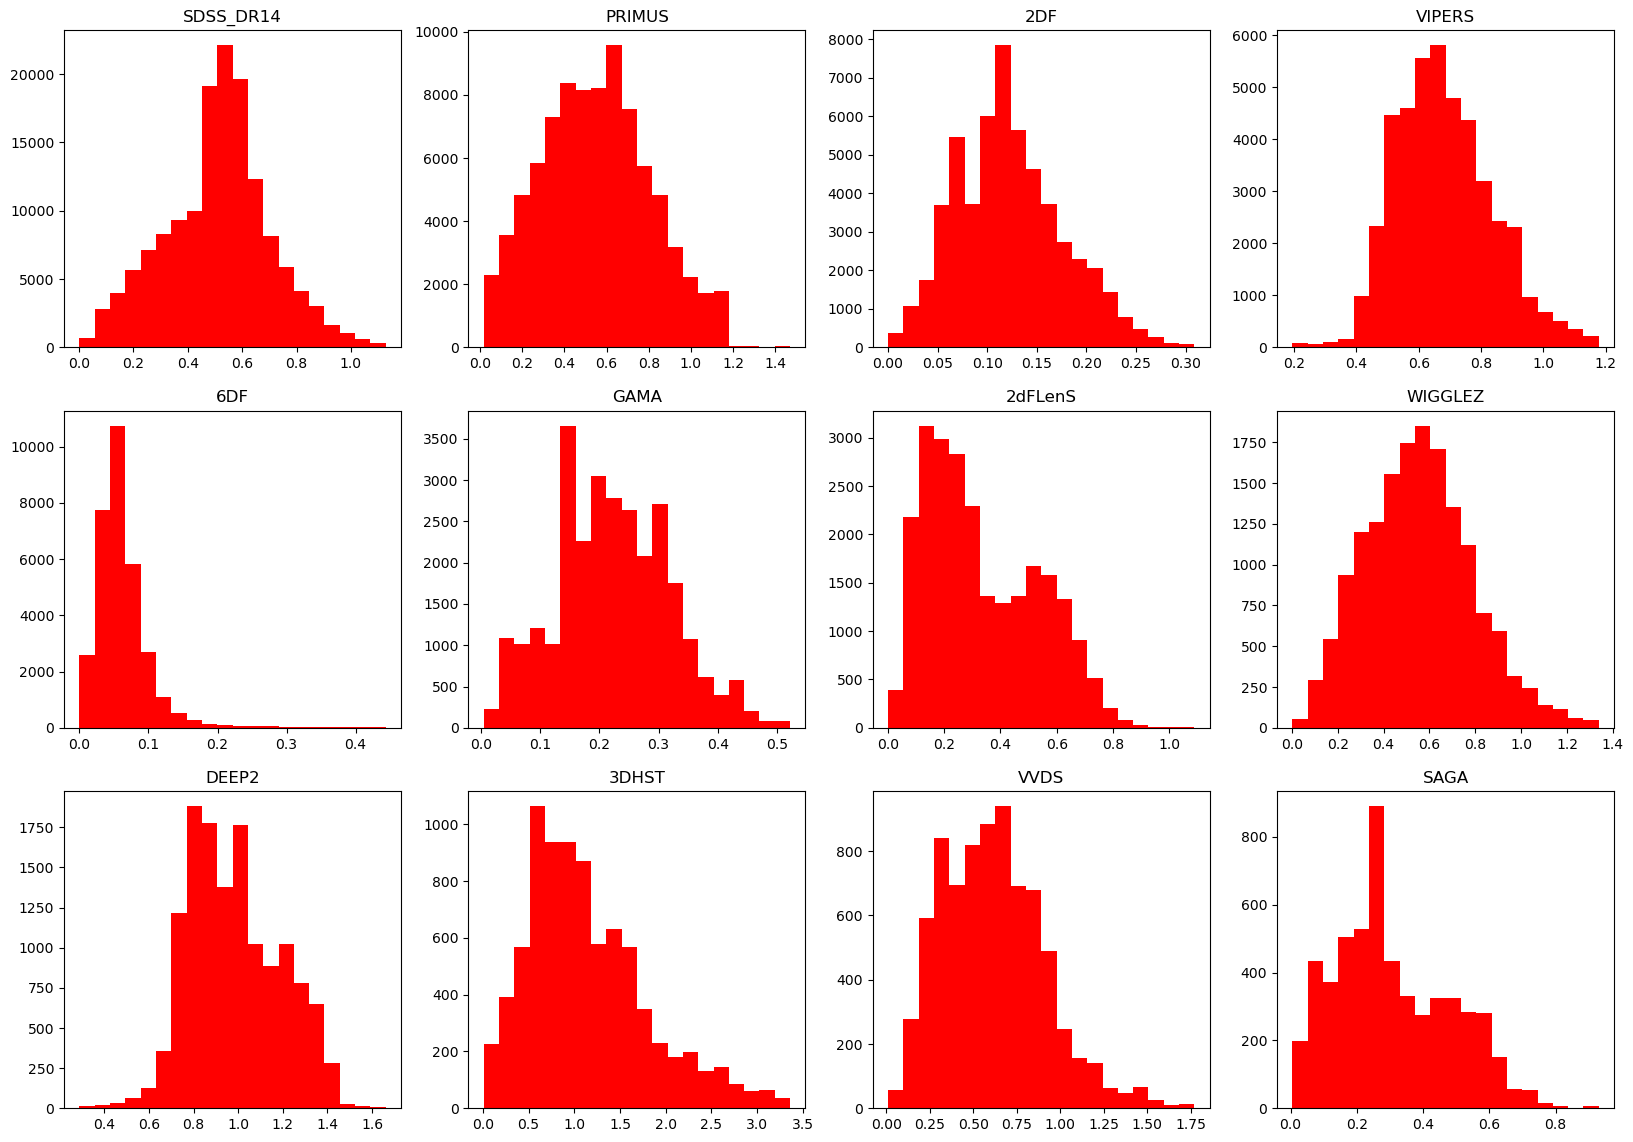

In [11]:
i=1
plt.figure(figsize = (20,14))
for catalog in element_count[:12]['source']:
    redshift = df[df['source'] == catalog]['z']
    plt.subplot(3, 4, i)
    std = np.std(redshift)
    mean = np.mean(redshift)
    redshift = redshift[(redshift< mean+3*std) & (redshift> mean-3*std)] #removing outliers with 3 std
    plt.hist(redshift, bins = 20, color = 'red')
    plt.title(catalog)
    i+=1

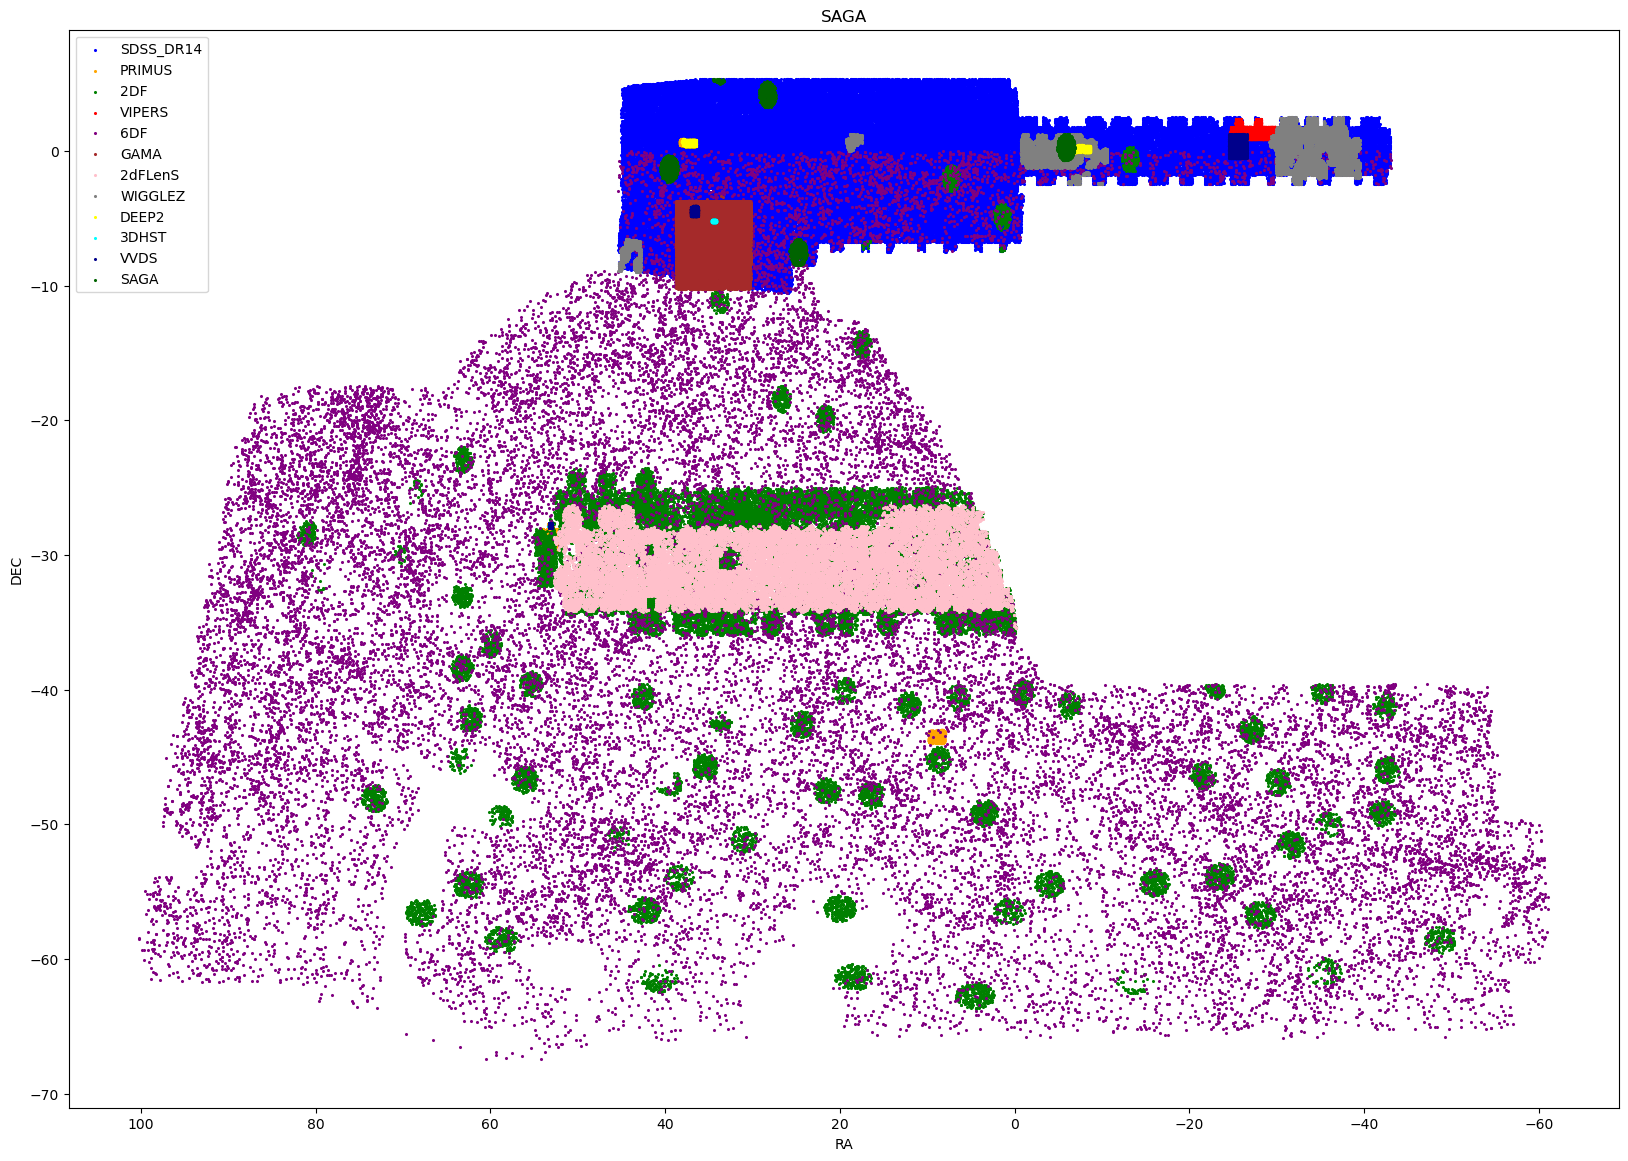

In [12]:
i=0
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan', 'darkblue', 'darkgreen']
df.loc[df['ra']>150,'ra'] = df[df['ra']>150]['ra'] - max(df['ra'])
plt.figure(figsize = (20,14))

for catalog in element_count[:12]['source']:
    ra = df[df['source'] == catalog]['ra']
    dec = df[df['source'] == catalog]['dec']
    plt.scatter(ra, dec, color = colors[i], s=1.5 , label = catalog)
    plt.title(catalog)
    i+=1
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend(loc = 2)
plt.gca().invert_xaxis()
plt.show()

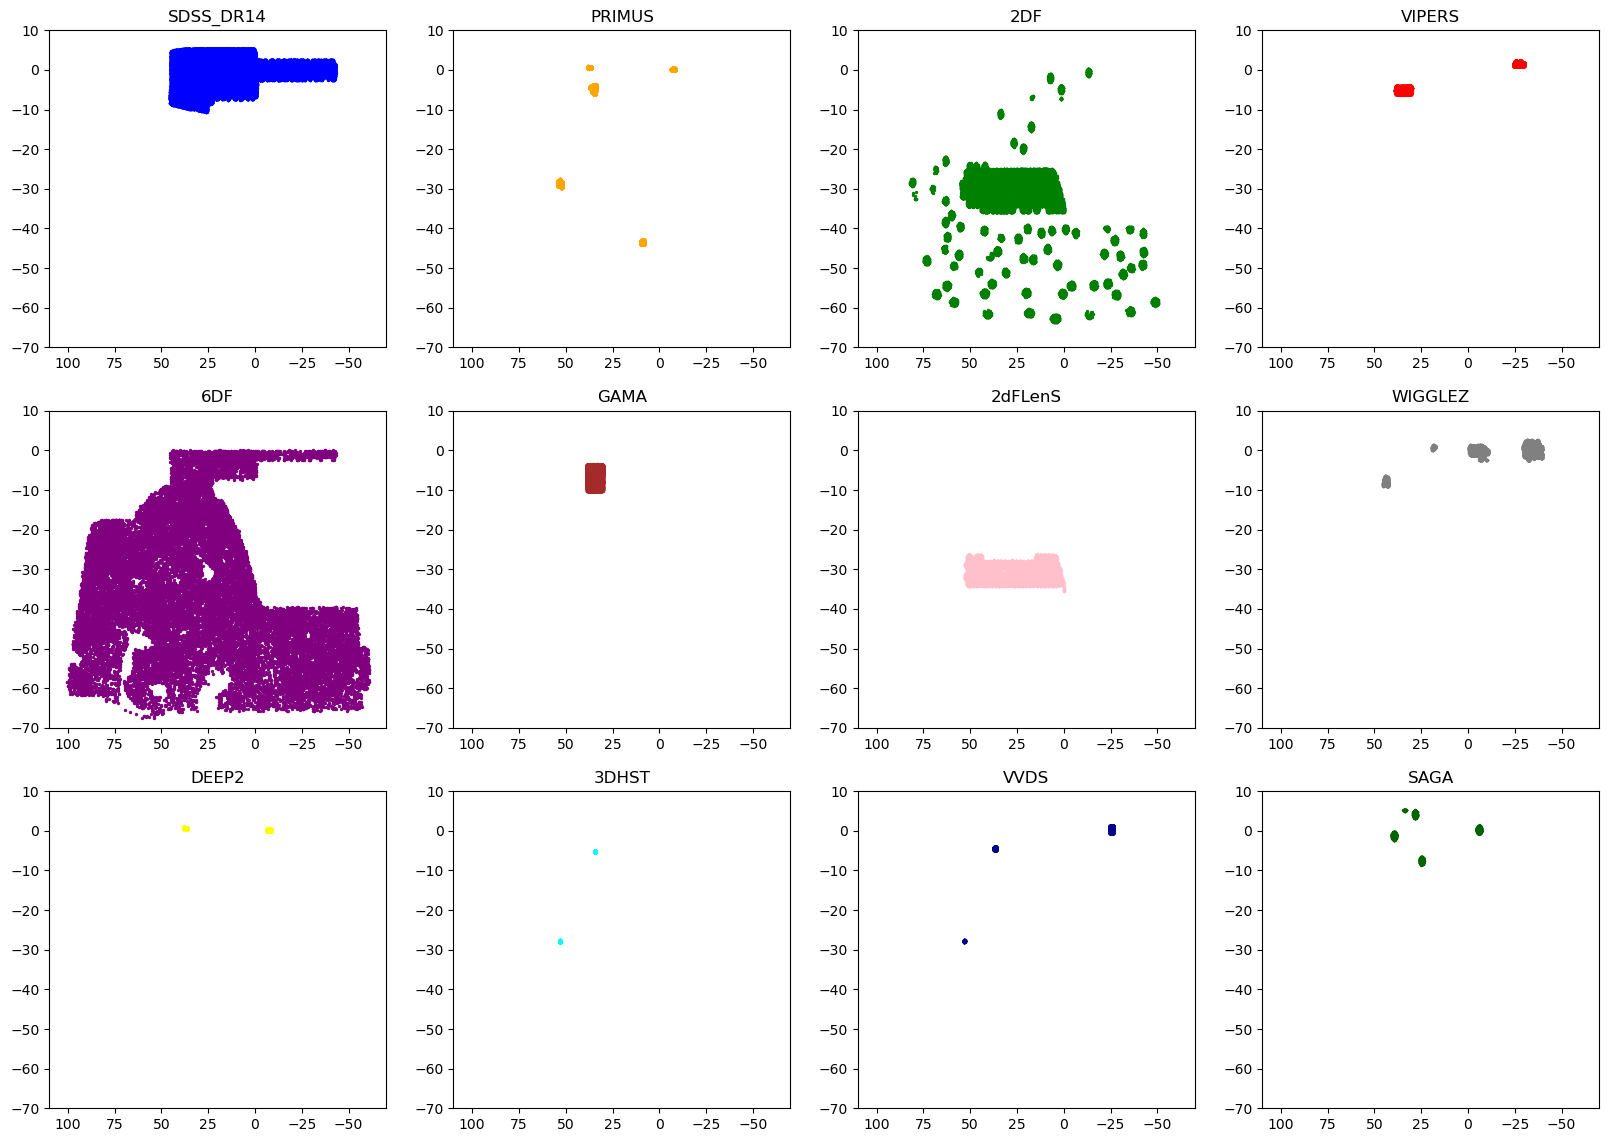

In [13]:
i=0
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan', 'darkblue', 'darkgreen']
plt.figure(figsize = (20,14))
for catalog in element_count[:12]['source']:
    ra = df[df['source'] ==catalog]['ra']
    dec = df[df['source'] ==catalog]['dec']
    plt.subplot(3,4,i+1)
    plt.scatter(ra, dec, color = colors[i], s=2)
    plt.xlim((110,-70))
    plt.ylim((-70,10))
    plt.title(catalog)
    i+=1
#plt.gca().invert_xaxis()
plt.show()

## Criando as colunas de índice de cor grizy

In [14]:
g = df['mag_auto_g_dered']
r = df['mag_auto_r_dered']
i = df['mag_auto_i_dered']
z = df['mag_auto_z_dered']
y = df['mag_auto_y_dered']

df['g-r'] = g-r
df['g-i'] = g-i
df['r-i'] = r-i
df['r-z'] = r-z
df['i-z'] = i-z
df['i-y'] = i-y
df['z-y'] = z-y

## g-r x r-i

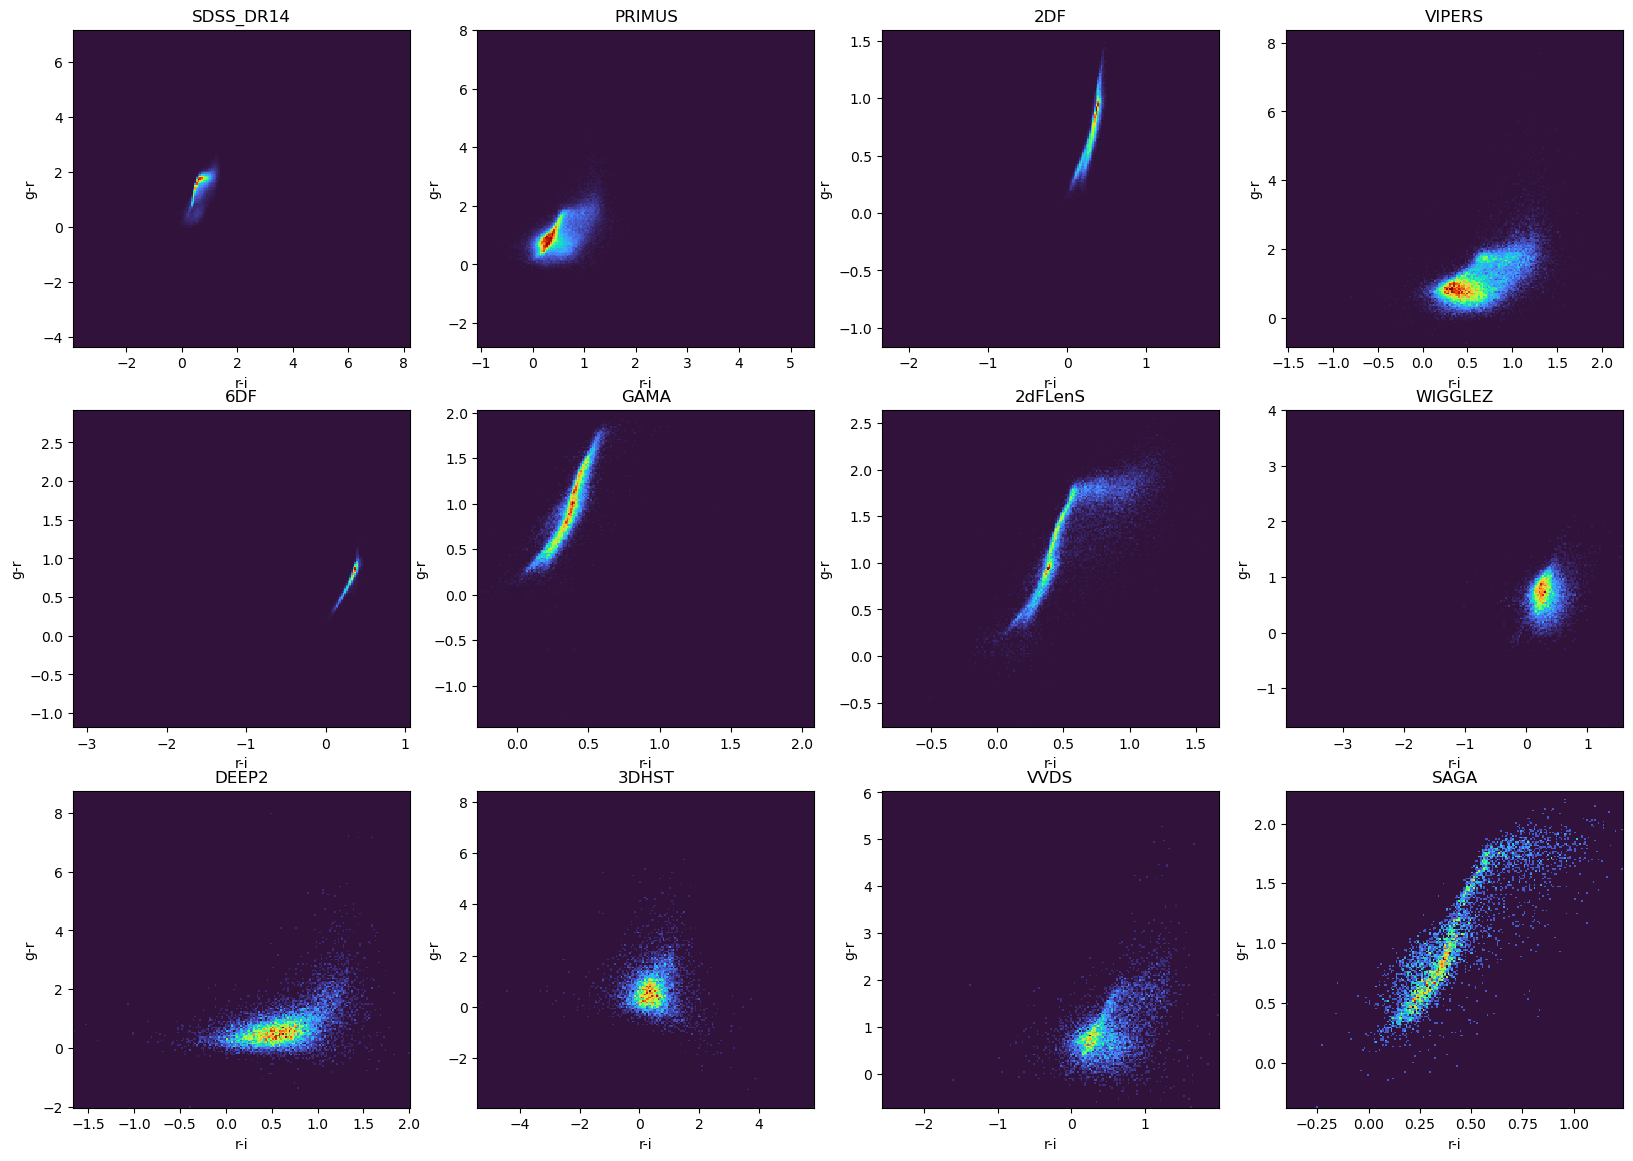

In [22]:
j=1
plt.figure(figsize = (20,14))
for catalog in element_count[:12]['source']:
    plt.subplot(3,4,j)
    gr = df[df['source'] == catalog]['g-r']
    ri = df[df['source'] == catalog]['r-i']
    plt.hist2d(ri, gr, bins = 200, density = True, cmap = 'turbo')
    plt.title(catalog)
    plt.xlabel('r-i')
    plt.ylabel('g-r')
    j+=1

plt.show()

## r-i x i-z

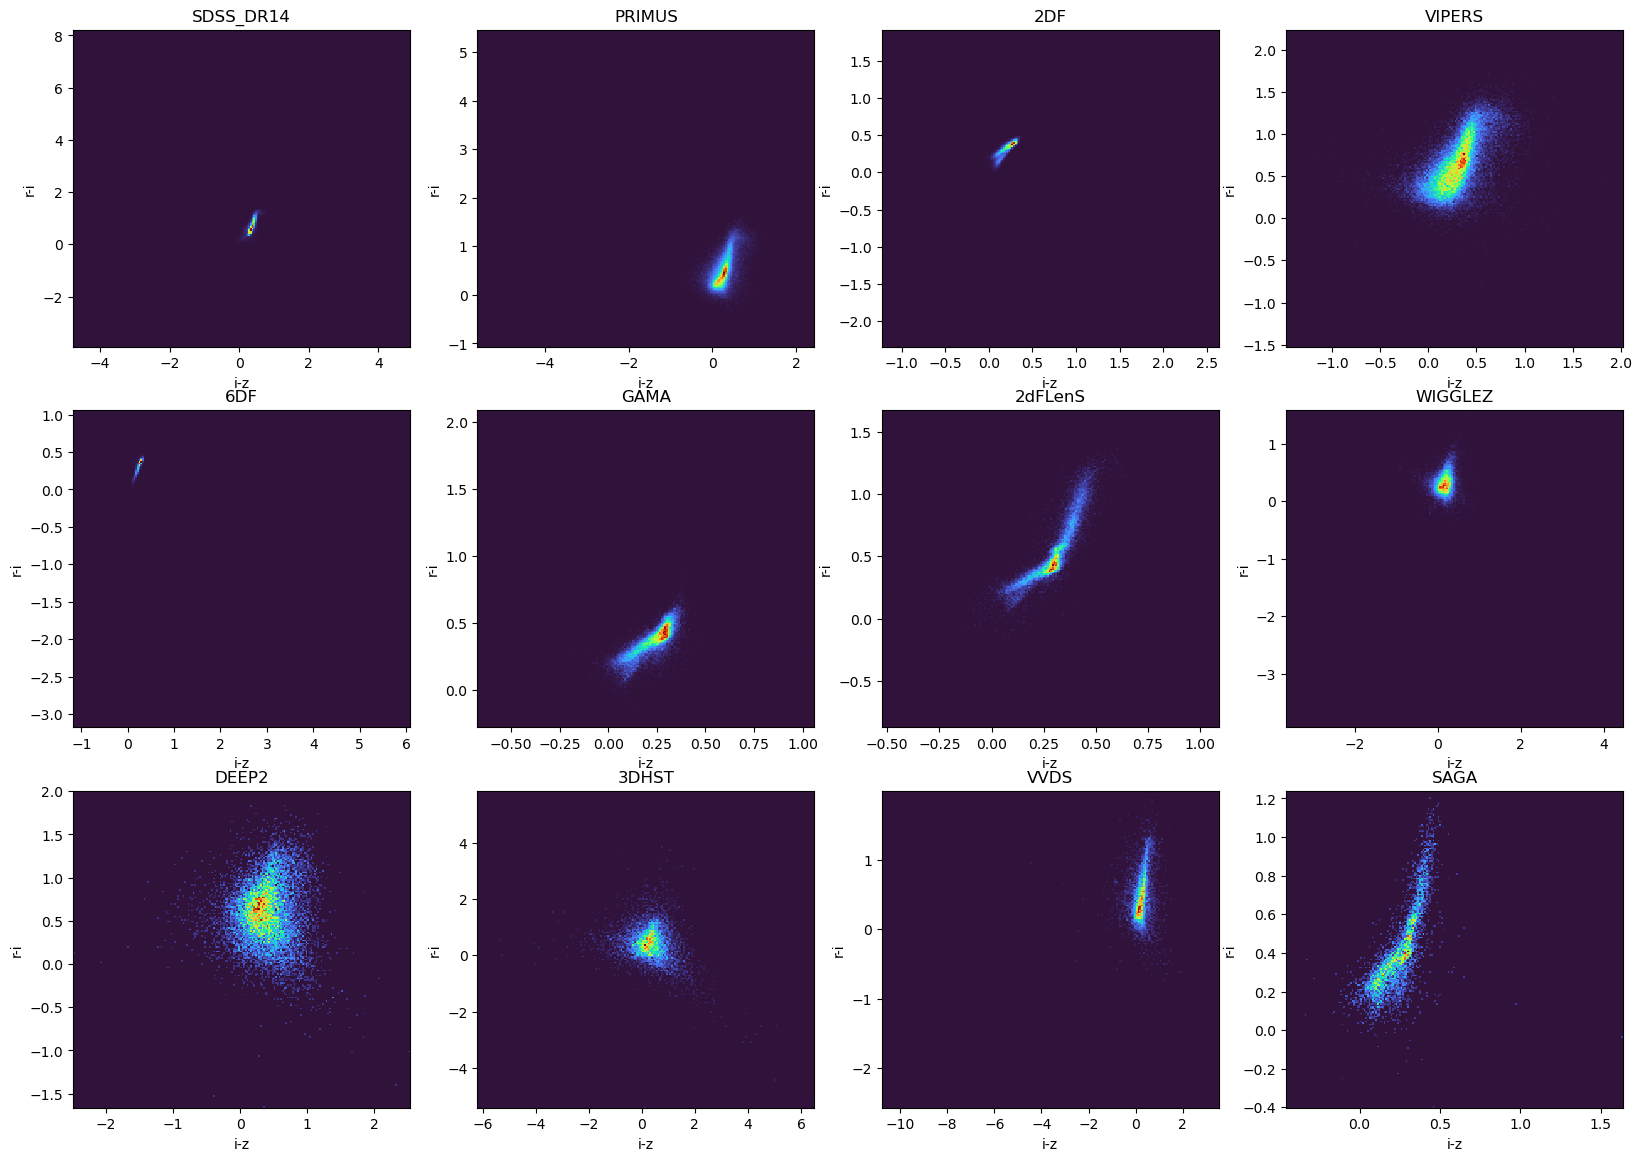

In [29]:
j=1
plt.figure(figsize = (20,14))
for catalog in element_count[:12]['source']:
    plt.subplot(3,4,j)
    ri = df[df['source'] == catalog]['r-i']
    iz = df[df['source'] == catalog]['i-z']
    plt.hist2d(iz, ri, bins = 200, density = True, cmap = 'turbo')
    plt.title(catalog)
    plt.xlabel('i-z')
    plt.ylabel('r-i')
    j+=1

plt.show()

## i-z x z-y

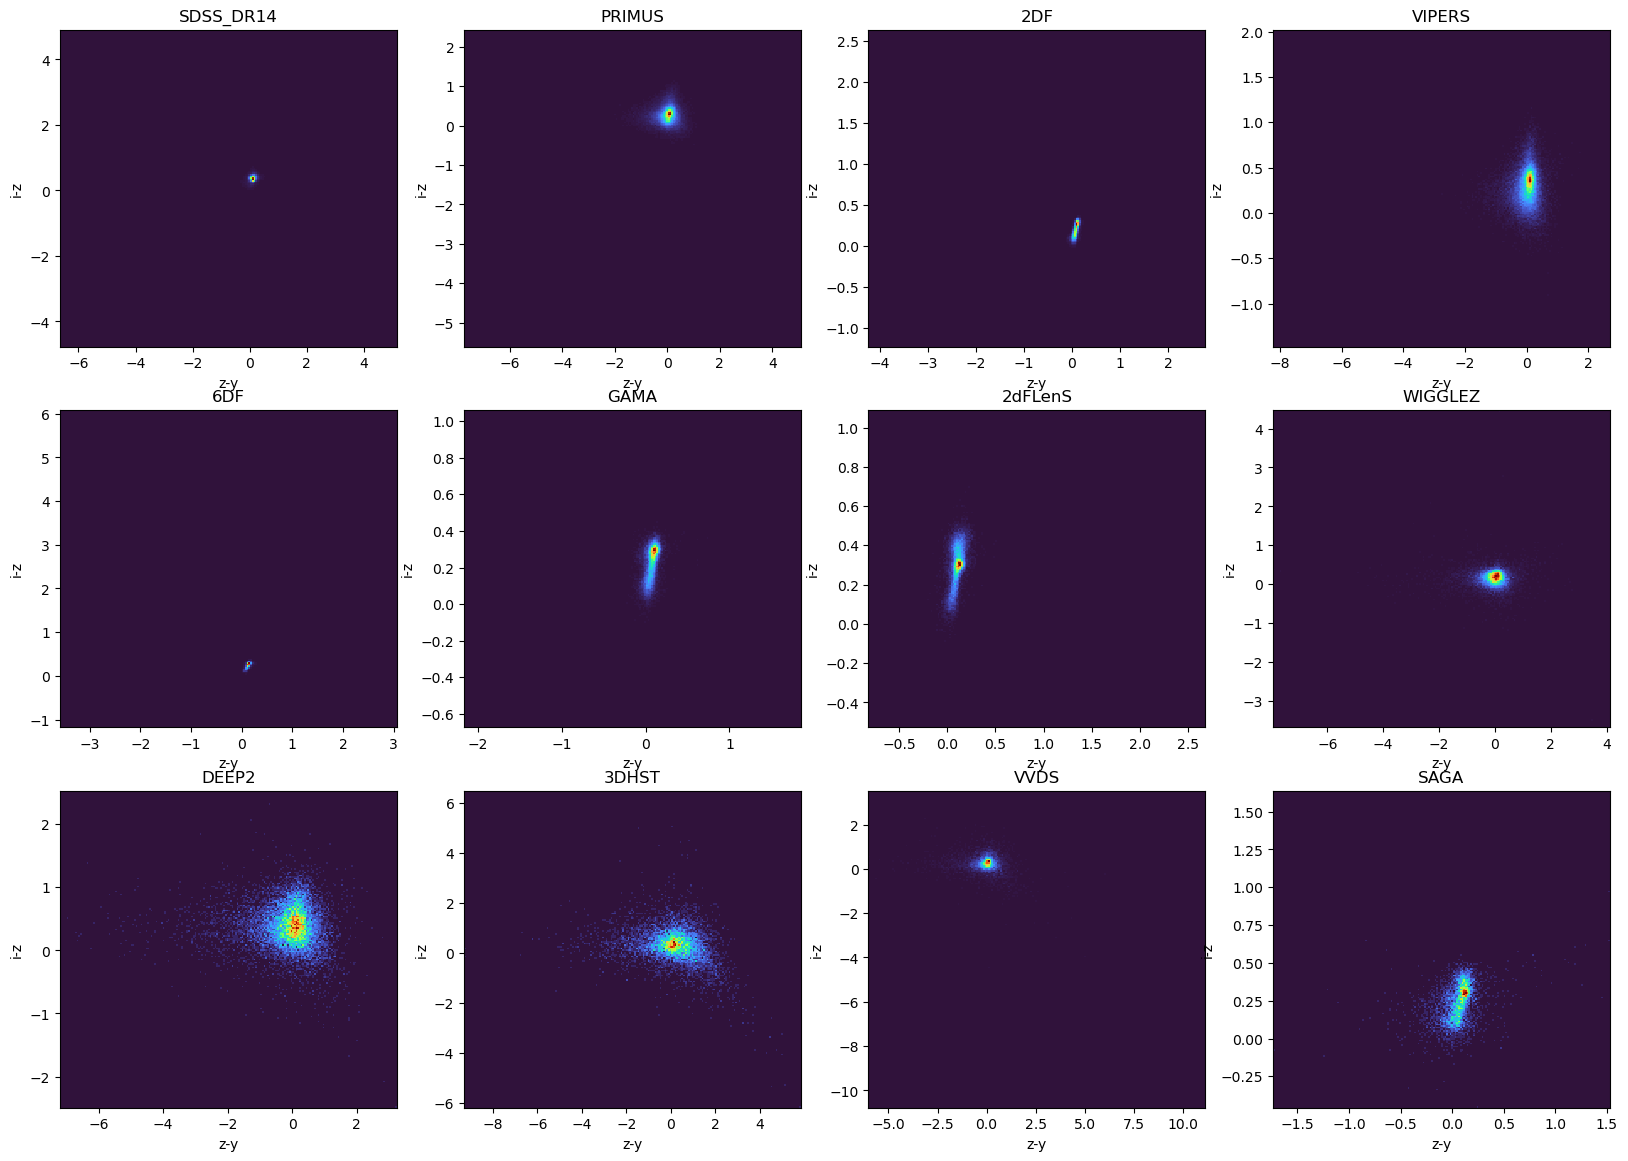

In [43]:
j=1
plt.figure(figsize = (20,14))
for catalog in element_count[:12]['source']:
    plt.subplot(3,4,j)
    iz = df[df['source'] == catalog]['i-z']
    zy = df[df['source'] == catalog]['z-y']
    plt.hist2d(zy, iz, bins = 200, density = True, cmap = 'turbo')
    plt.title(catalog)
    plt.xlabel('z-y')
    plt.ylabel('i-z')
    j+=1

plt.show()

# Por catálogo

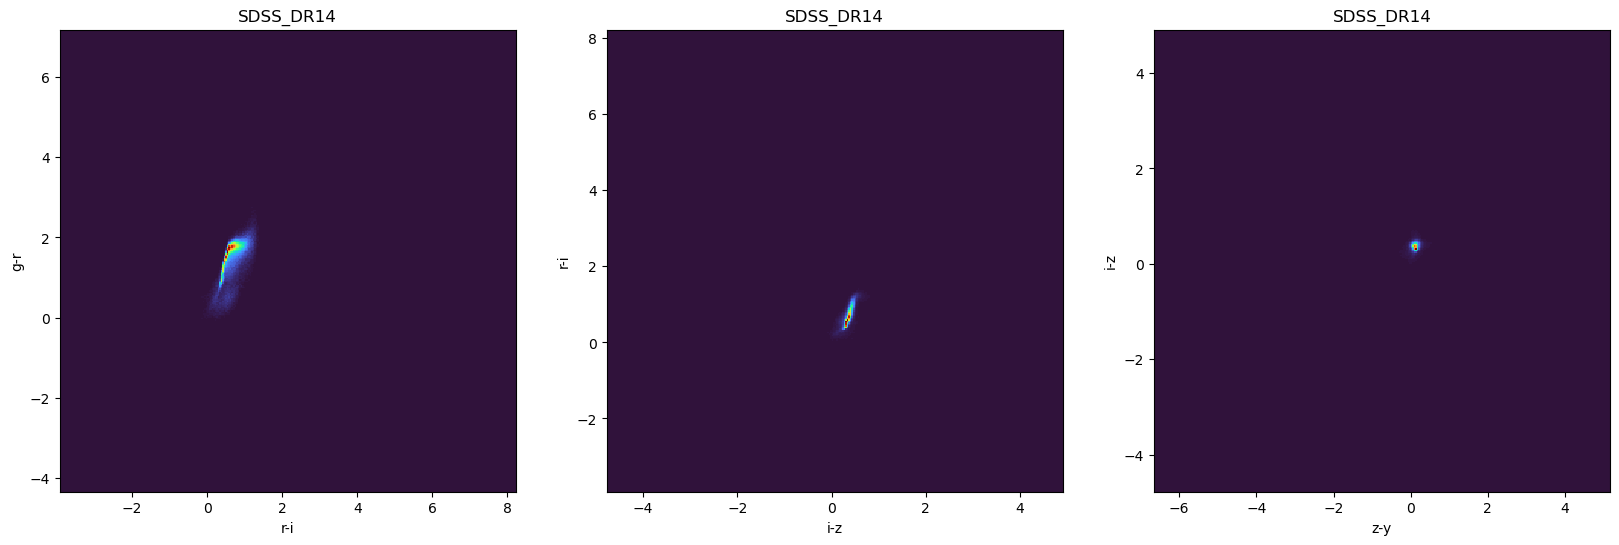

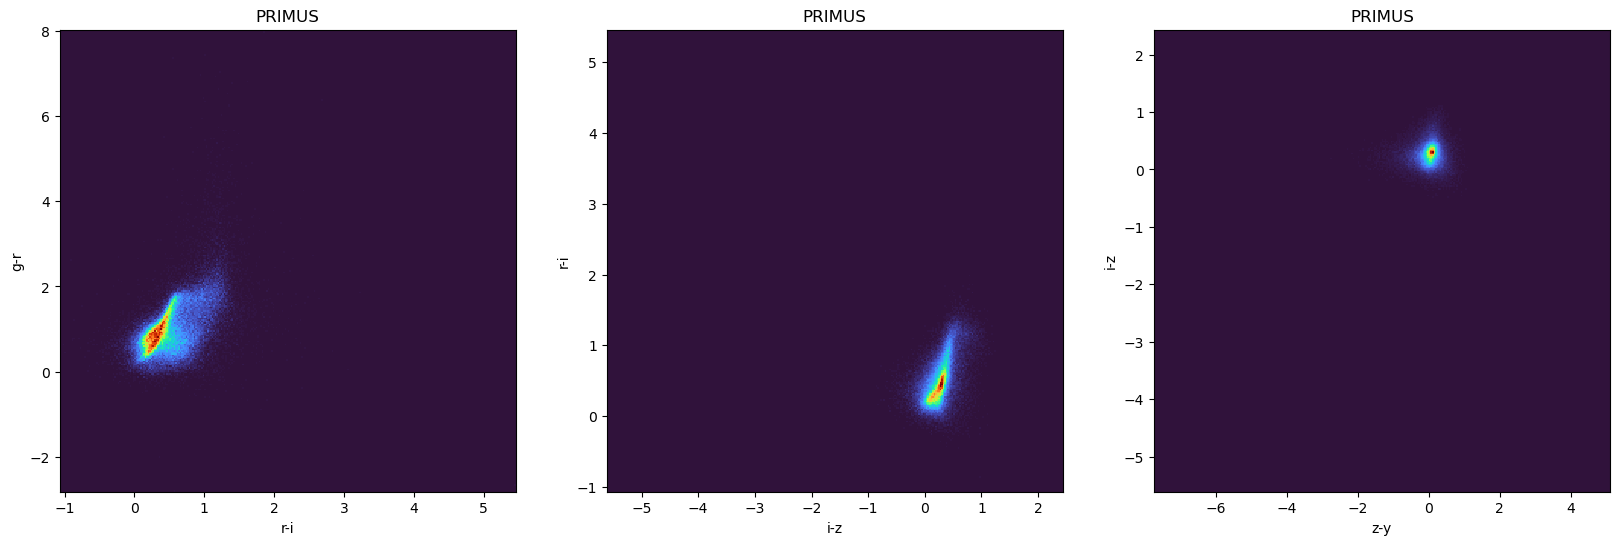

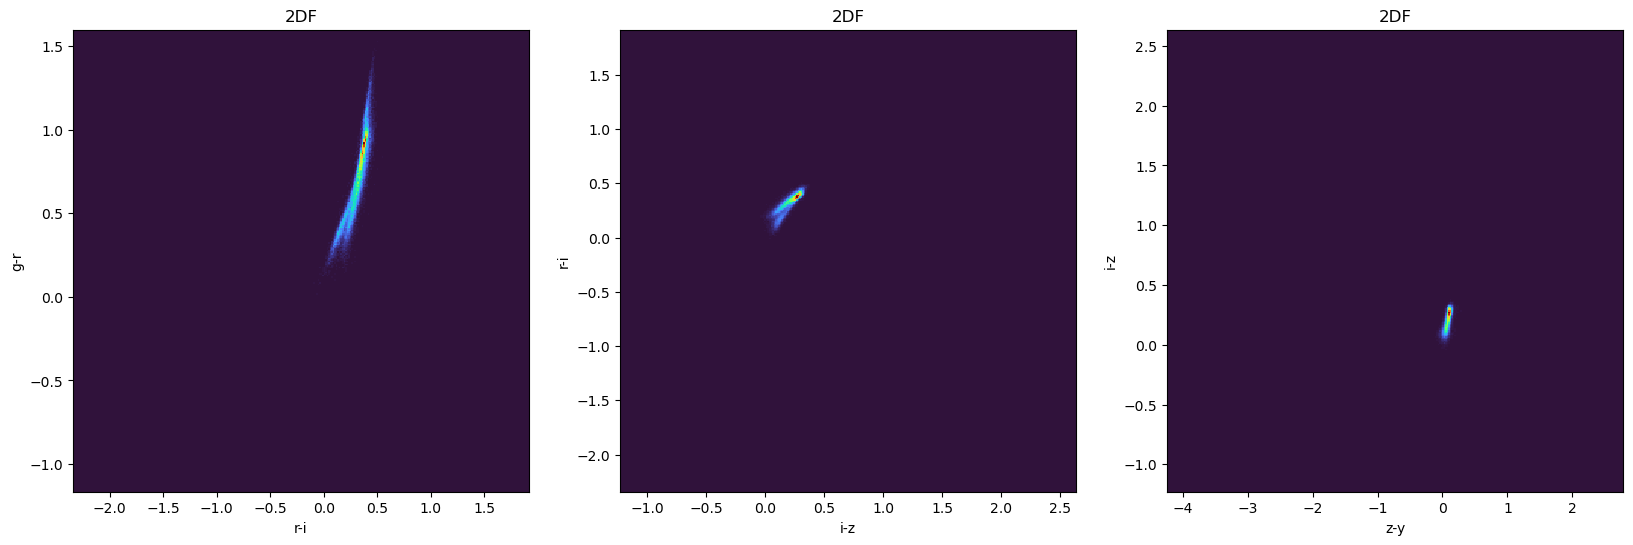

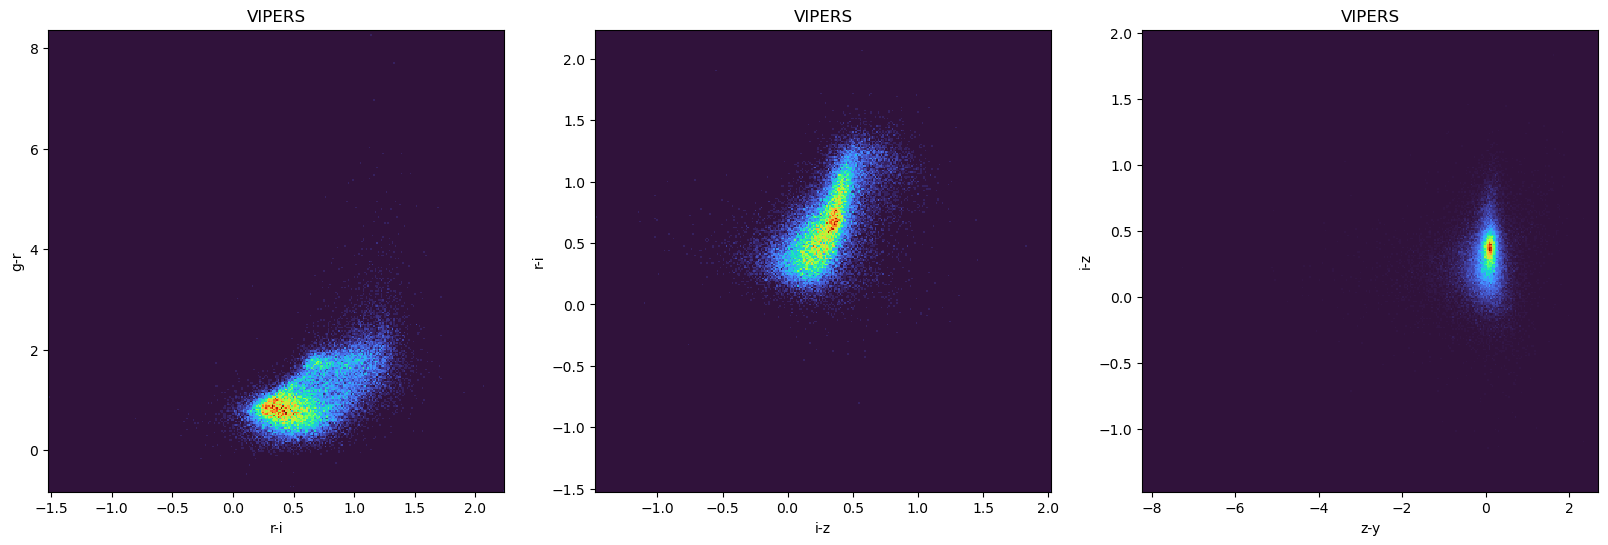

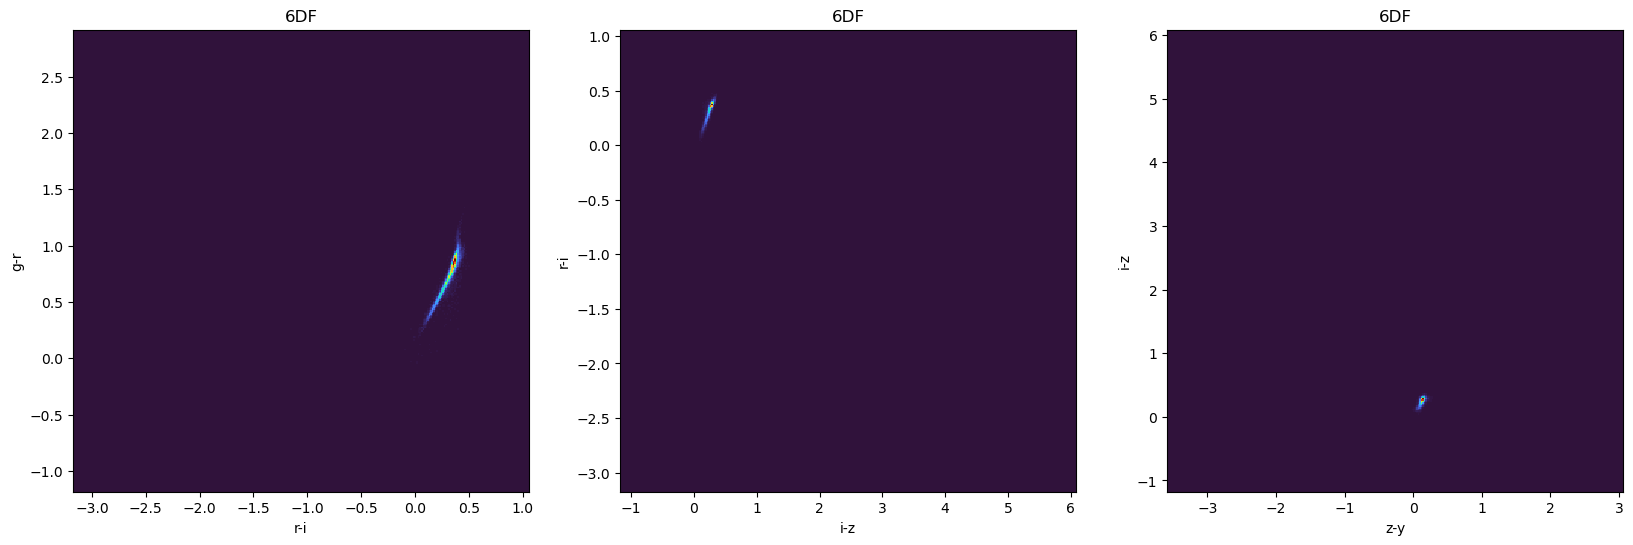

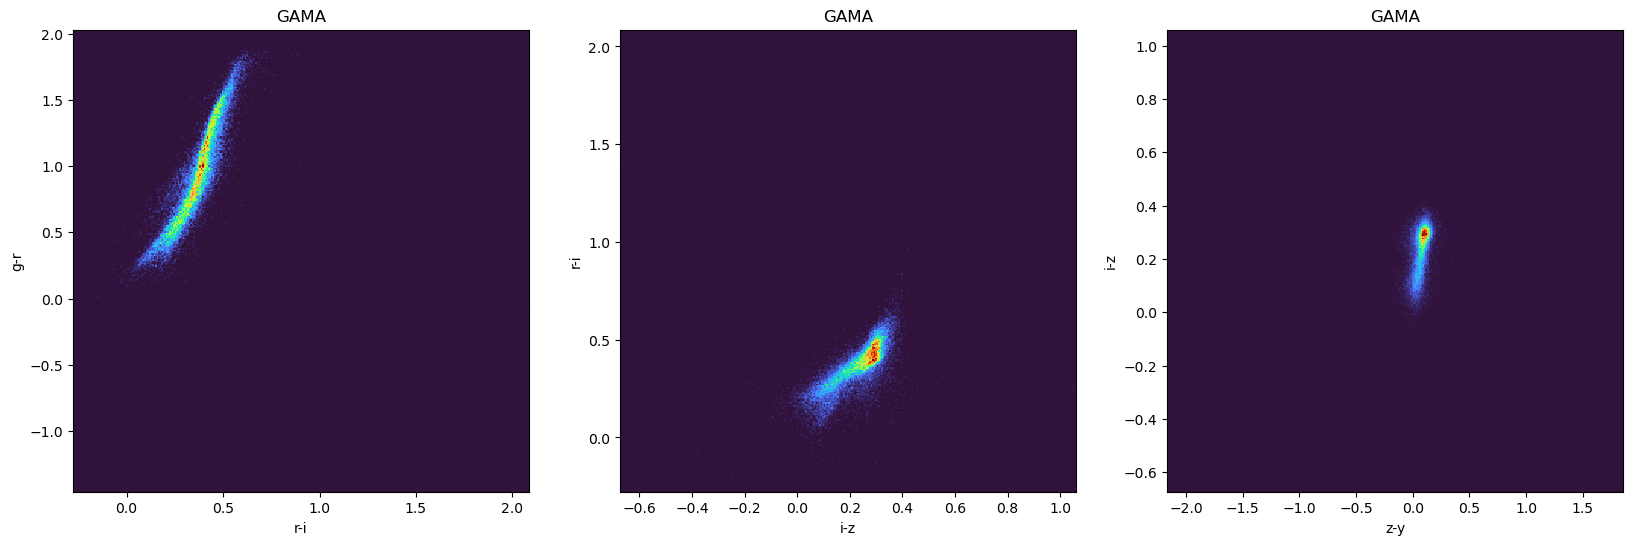

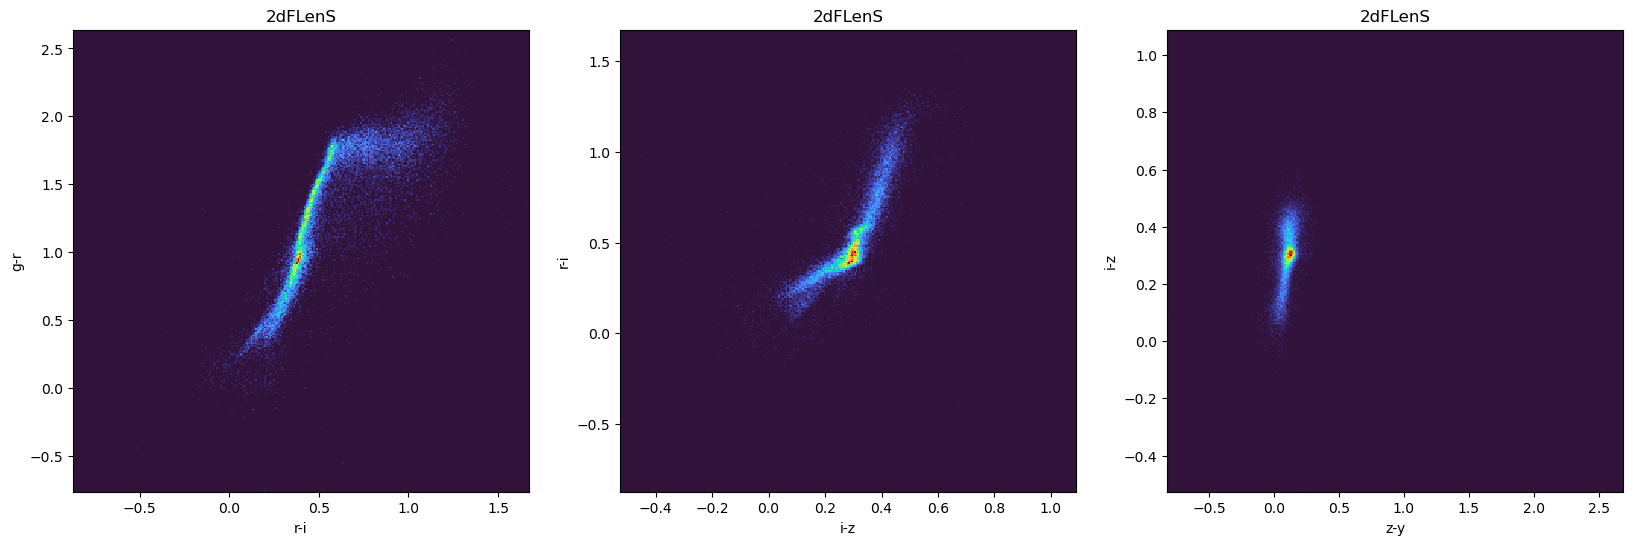

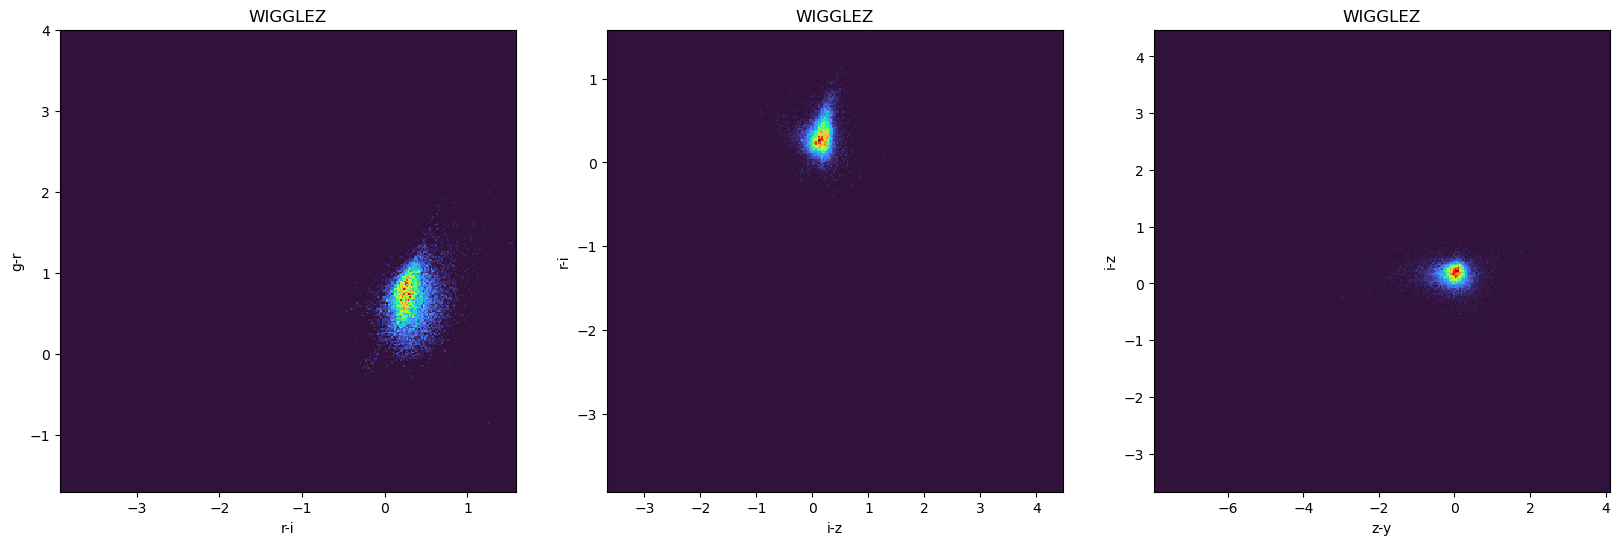

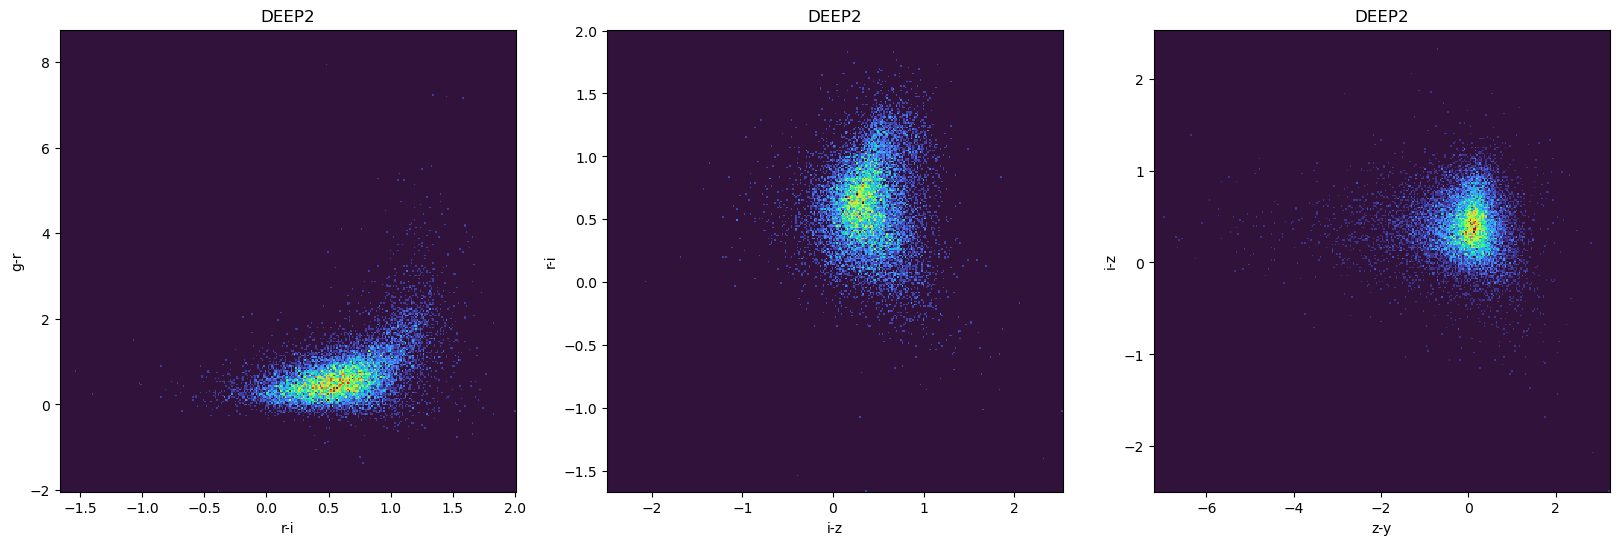

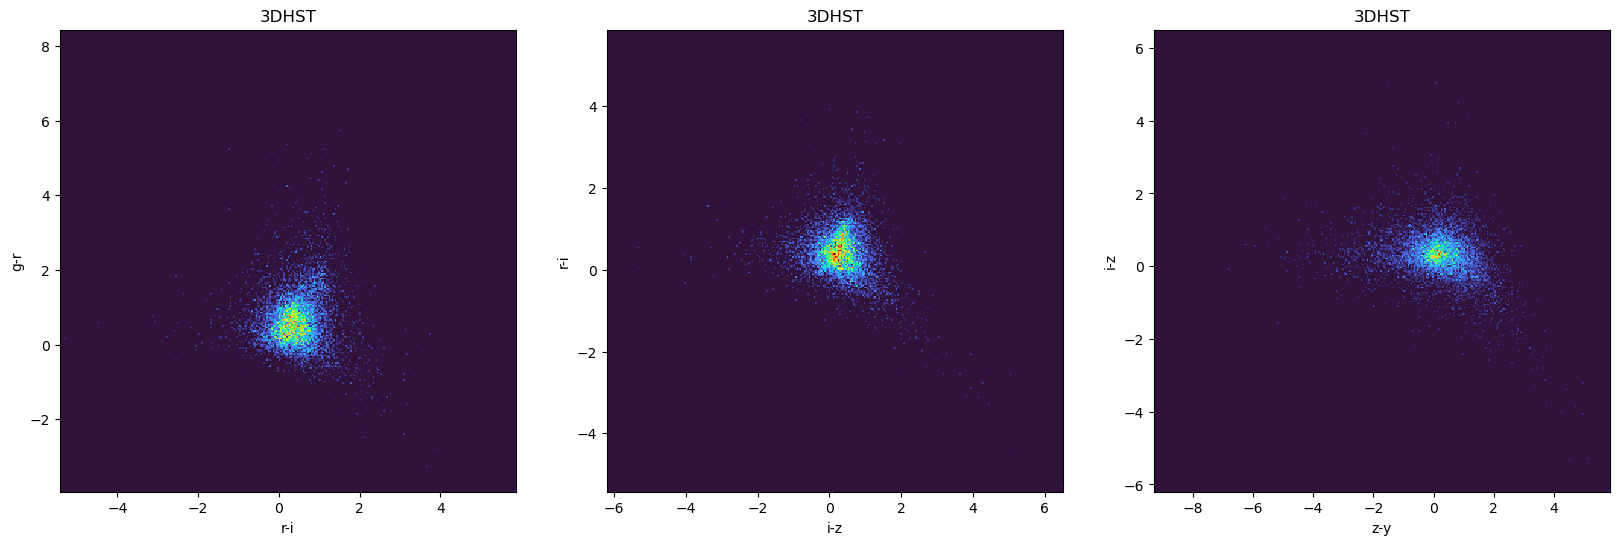

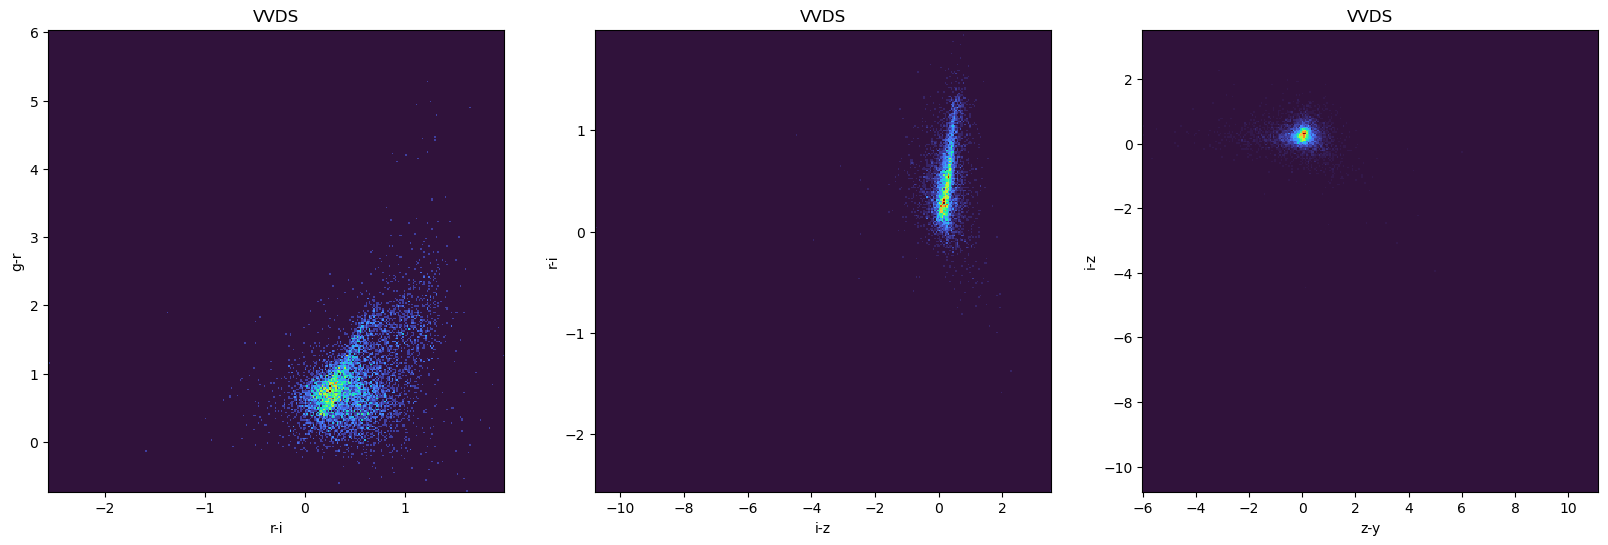

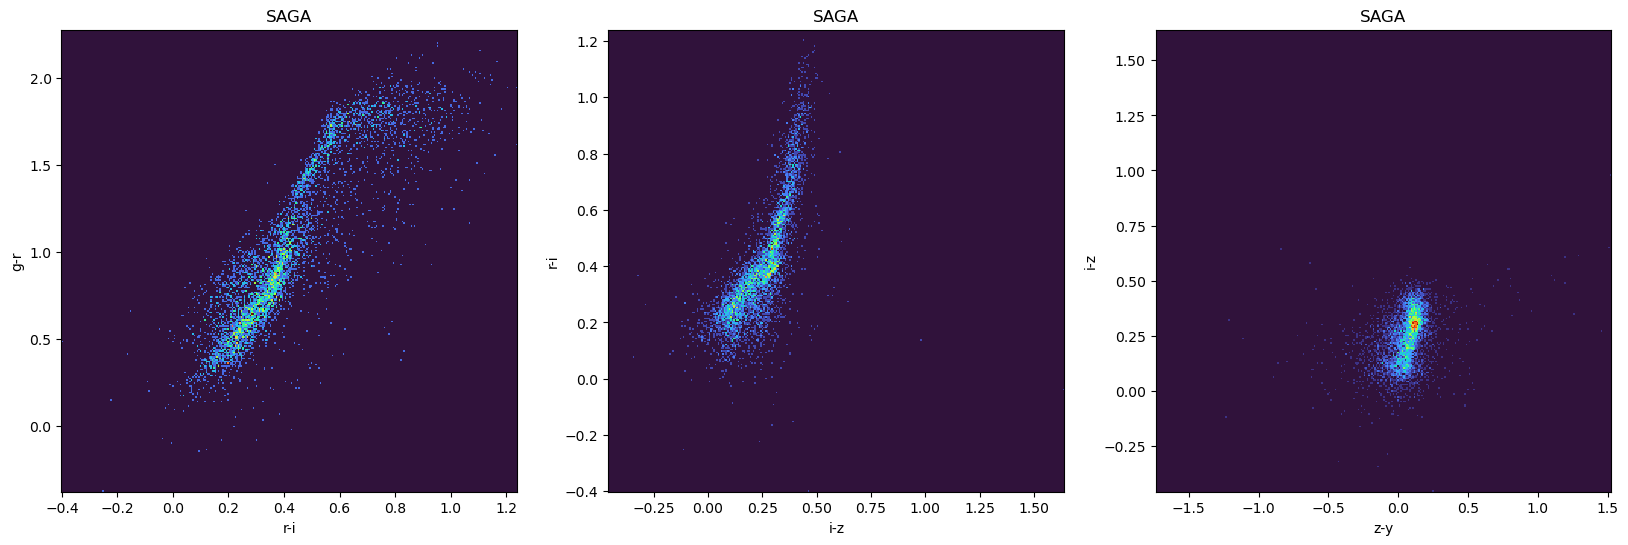

In [66]:
for catalog in element_count[:12]['source']:
    df_catalog = df[df['source'] == catalog]
    j=1
    plt.figure(figsize = (20,6))
    color_index = ['g-r','r-i','i-z','z-y']
    for i in range(len(color_index)-1):
        plt.subplot(1,3,j)
        x = df_catalog[color_index[i+1]]
        y = df_catalog[color_index[i]]
        plt.hist2d(x, y, bins = 300, cmap = 'turbo' )
        plt.xlabel(color_index[i+1])
        plt.ylabel(color_index[i])
        plt.title(catalog)
        j+=1
    plt.show()